In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from print_array import *

In [27]:
def polyvalue(polyparamvec,x):
    y=0
    for i in range(polyparamvec.shape[0]):
       y+=polyparamvec[i]*x**i
    return y

def piecewise_poly(param,n):
    s=param.shape
    vec=np.zeros([s[0]*n])
    for i in range(s[0]):
       vec[i*n:(i+1)*n]=polyvalue(param[i,:],np.linspace(0,1,num=n,endpoint=False))       
    return vec

plt.figure()
N=6
p=np.random.rand(N+1,1)
A=np.zeros([4*N,4*N])
for i in range(N):
    A[i,4*i]=1
    A[N+i,4*i:4*i+4]=[1,1,1,1]
    A[2*N+i,4*i:4*i+4]=[0,1,2,3]
    A[3*N+i,4*i:4*i+4]=[0,0,2,6]
for i in range(N-1):
    A[2*N+i,4*i:4*i+8]=[0,1,2,3,0,-1,0,0]
    A[3*N+i,4*i:4*i+8]=[0,0,2,6,0,0,-2,0]
    
A[2*N:3*N-1, :4] = 0
A[4*N-1, 4*N-2] = 0
A[4*N-1, 4*N-1] = 0
       
b=np.zeros([4*N,1])
b[:N]=p[:N]
b[N:2*N]=p[1:]
x=np.linalg.inv(A).dot(b)


Np=100
plt.plot(np.linspace(0,N,num=Np*N),piecewise_poly(np.reshape(x,[N,4]),Np),'r')

plt.plot(p,linestyle='None',marker='x', markersize=10, markeredgewidth=3, color='black')
plt.xlim([-0.1,N+0.1])
plt.show()

LinAlgError: Singular matrix

<Figure size 432x288 with 0 Axes>

In [21]:
A

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.

new minimum at ( 0.05 , 0.0 ) f= -0.029530343146088704 1.0 0.0


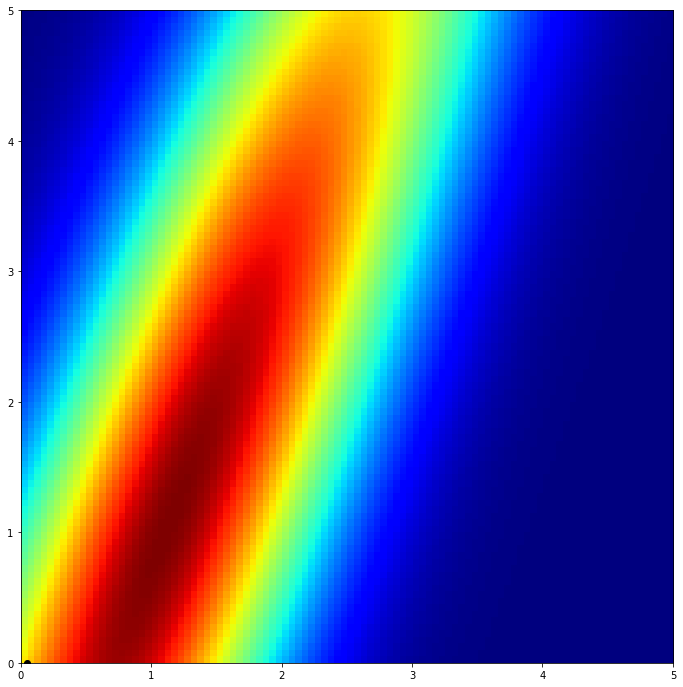

new minimum at ( 0.1 , 0.0 ) f= -0.030968596455304708 2.0 0.0


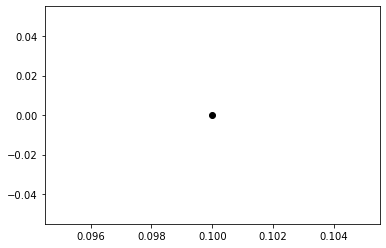

new minimum at ( 0.15000000000000002 , 0.0 ) f= -0.032358700614775054 3.0000000000000004 0.0


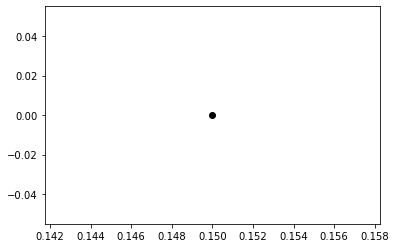

new minimum at ( 0.2 , 0.0 ) f= -0.03368814878922059 4.0 0.0


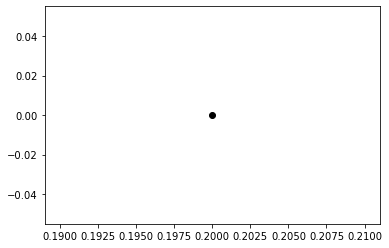

new minimum at ( 0.25 , 0.0 ) f= -0.0349445732245032 5.0 0.0


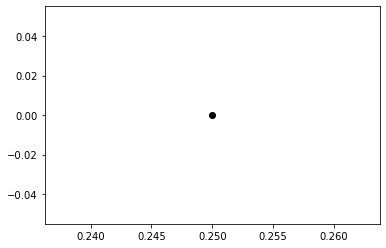

new minimum at ( 0.30000000000000004 , 0.0 ) f= -0.036115934504304226 6.000000000000001 0.0


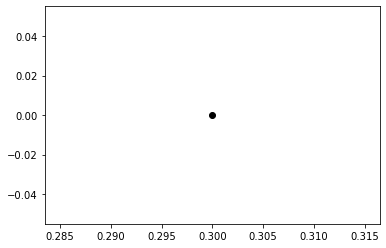

new minimum at ( 0.35000000000000003 , 0.0 ) f= -0.03719071213024606 7.0 0.0


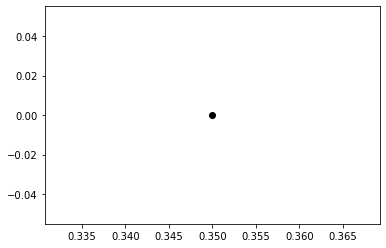

new minimum at ( 0.4 , 0.0 ) f= -0.03815809224507766 8.0 0.0


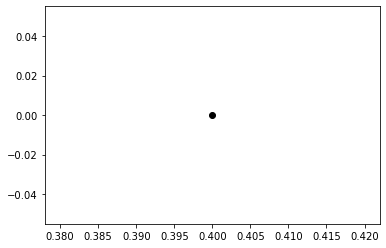

new minimum at ( 0.45 , 0.0 ) f= -0.03900814824471305 9.0 0.0


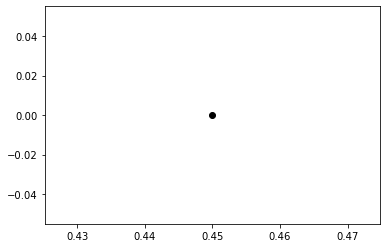

new minimum at ( 0.5 , 0.0 ) f= -0.03973201007411514 10.0 0.0


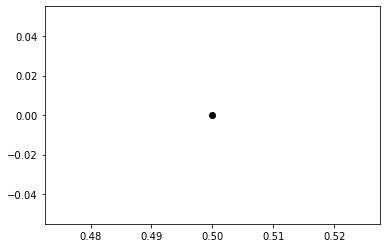

new minimum at ( 0.55 , 0.0 ) f= -0.04032201817650751 11.0 0.0


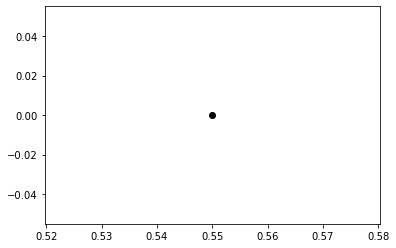

new minimum at ( 0.6000000000000001 , 0.0 ) f= -0.04077185836288567 12.000000000000002 0.0


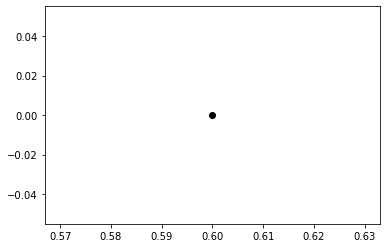

new minimum at ( 0.65 , 0.0 ) f= -0.041076674282426374 13.0 0.0


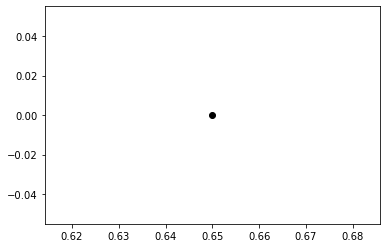

new minimum at ( 0.65 , 0.05 ) f= -0.04108123901553444 13.0 1.0


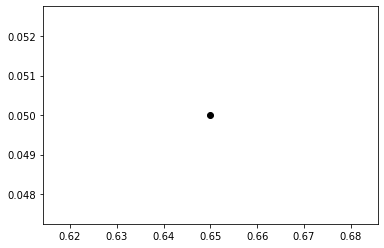

new minimum at ( 0.7000000000000001 , 0.0 ) f= -0.04123315469289032 14.0 0.0


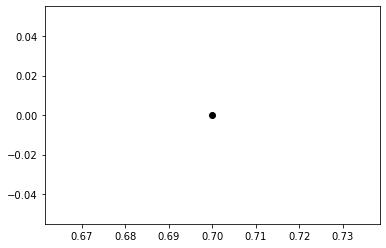

new minimum at ( 0.7000000000000001 , 0.05 ) f= -0.04129289432070424 14.0 1.0


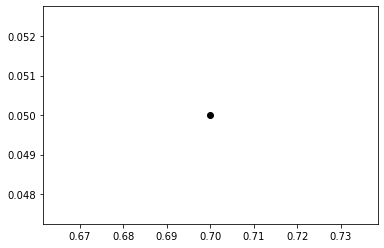

new minimum at ( 0.7000000000000001 , 0.1 ) f= -0.04132745395554581 14.0 2.0


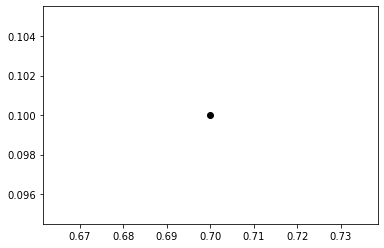

new minimum at ( 0.7000000000000001 , 0.15000000000000002 ) f= -0.04133677027369446 14.0 3.0000000000000004


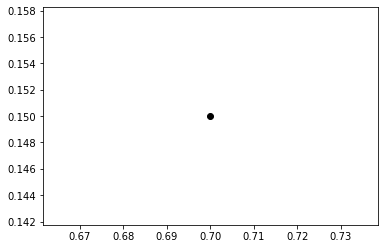

new minimum at ( 0.75 , 0.05 ) f= -0.04135458220030611 15.0 1.0


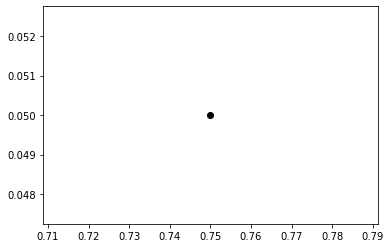

new minimum at ( 0.75 , 0.1 ) f= -0.04144455355036073 15.0 2.0


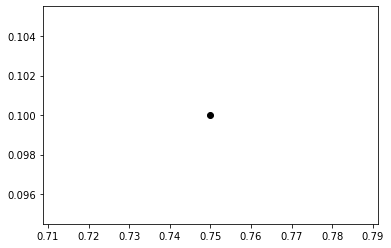

new minimum at ( 0.75 , 0.15000000000000002 ) f= -0.041509342895308686 15.0 3.0000000000000004


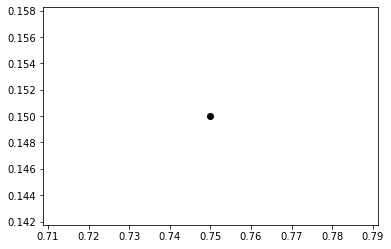

new minimum at ( 0.75 , 0.2 ) f= -0.041548831634116386 15.0 4.0


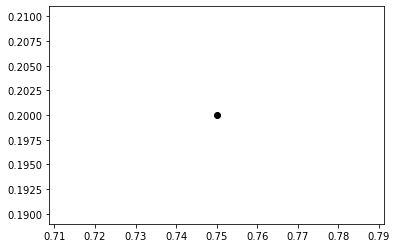

new minimum at ( 0.75 , 0.25 ) f= -0.04156294741951306 15.0 5.0


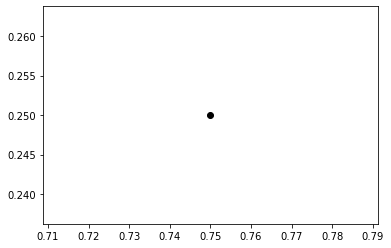

new minimum at ( 0.8 , 0.2 ) f= -0.04162604570132747 16.0 4.0


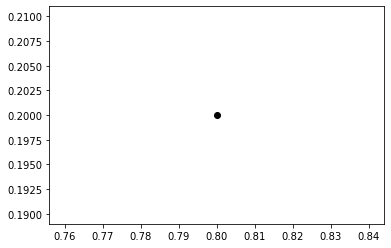

new minimum at ( 0.8 , 0.25 ) f= -0.04169588352281037 16.0 5.0


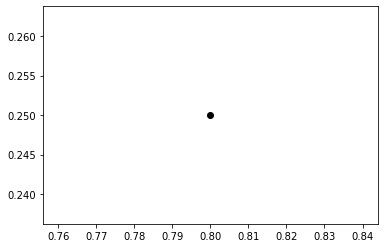

new minimum at ( 0.8 , 0.30000000000000004 ) f= -0.0417403195535558 16.0 6.000000000000001


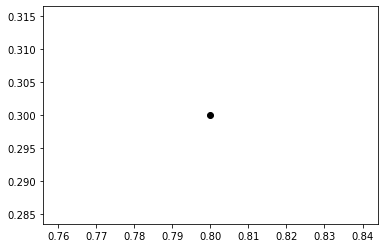

new minimum at ( 0.8 , 0.35000000000000003 ) f= -0.041759272392596844 16.0 7.0


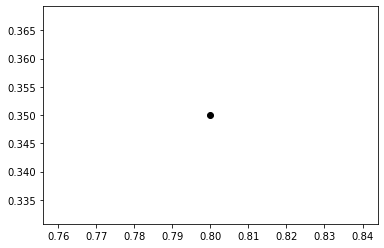

new minimum at ( 0.8500000000000001 , 0.30000000000000004 ) f= -0.04177722954815433 17.0 6.000000000000001


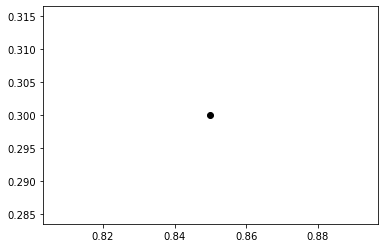

new minimum at ( 0.8500000000000001 , 0.35000000000000003 ) f= -0.04185210362313023 17.0 7.0


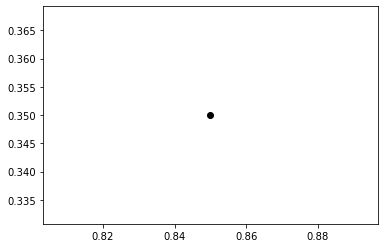

new minimum at ( 0.8500000000000001 , 0.4 ) f= -0.04190149439024062 17.0 8.0


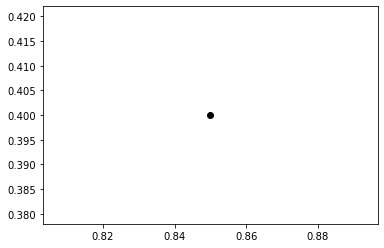

new minimum at ( 0.8500000000000001 , 0.45 ) f= -0.04192531138475444 17.0 9.0


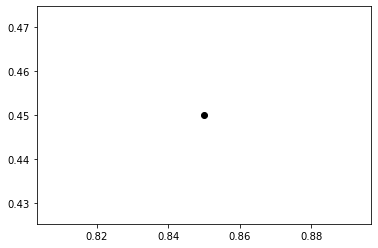

new minimum at ( 0.9 , 0.45 ) f= -0.04197765672204926 18.0 9.0


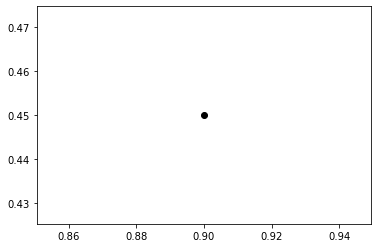

new minimum at ( 0.9 , 0.5 ) f= -0.04203199882080682 18.0 10.0


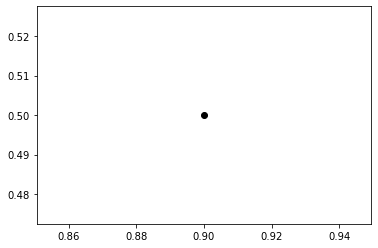

new minimum at ( 0.9 , 0.55 ) f= -0.04206069643714221 18.0 11.0


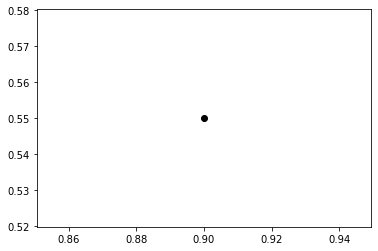

new minimum at ( 0.9 , 0.6000000000000001 ) f= -0.04206369698161625 18.0 12.000000000000002


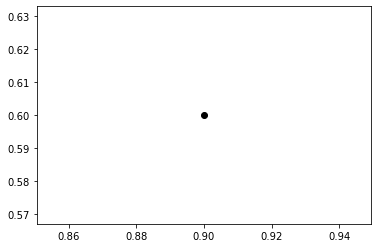

new minimum at ( 0.9500000000000001 , 0.55 ) f= -0.042072263731591036 19.0 11.0


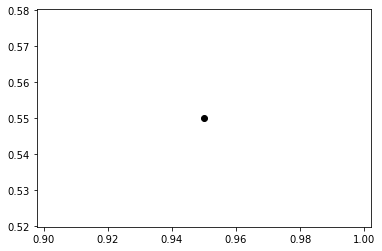

new minimum at ( 0.9500000000000001 , 0.6000000000000001 ) f= -0.04213154284210611 19.0 12.000000000000002


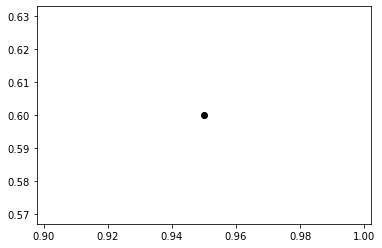

new minimum at ( 0.9500000000000001 , 0.65 ) f= -0.042165126798957626 19.0 13.0


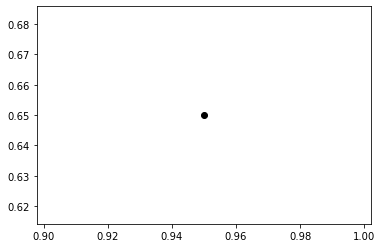

new minimum at ( 0.9500000000000001 , 0.7000000000000001 ) f= -0.042172954063981555 19.0 14.0


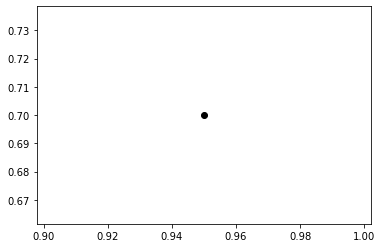

new minimum at ( 1.0 , 0.7000000000000001 ) f= -0.04219990484499356 20.0 14.0


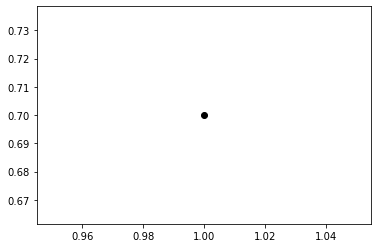

new minimum at ( 1.0 , 0.75 ) f= -0.04223837004065825 20.0 15.0


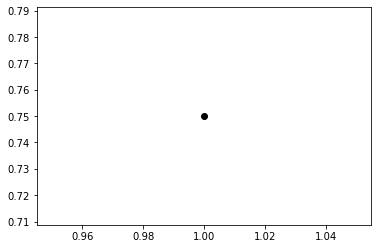

new minimum at ( 1.0 , 0.8 ) f= -0.04225103909582703 20.0 16.0


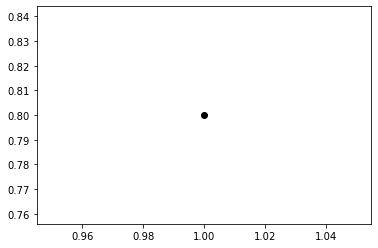

new minimum at ( 1.05 , 0.8500000000000001 ) f= -0.04228026291593917 21.0 17.0


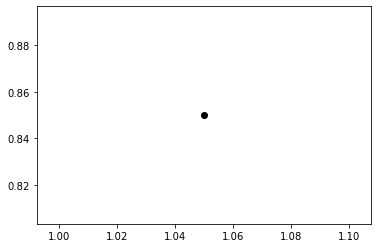

new minimum at ( 1.05 , 0.9 ) f= -0.04229777807131974 21.0 18.0


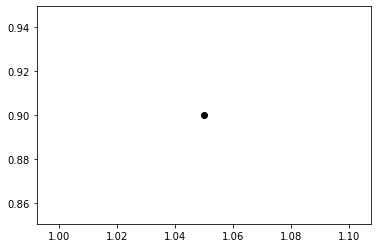

new minimum at ( 1.1 , 1.0 ) f= -0.04231306673391351 22.0 20.0


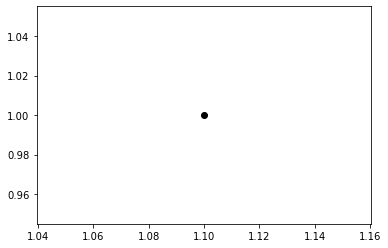

minimum at ( 1.1021407096052278 , 1.0229137471254388 ), minimum found at ( 1.1 , 1.0 )
time needed for search: 10.16395354270935 s


In [33]:
#complete search script

import matplotlib.pyplot as plt
import numpy as np
import time

#create a guassian test function
x1=np.random.uniform(1,4);x2=np.random.uniform(1,4)
sig1=np.random.uniform(0.05,5); sig2=np.random.uniform(0.05,5); theta=np.random.uniform(0,2*np.pi)
f=lambda x: -np.exp(-0.5*((((x[0]-x1)*np.cos(theta)-(x[1]-x2)*np.sin(theta))/sig1)**2+(((x[0]-x1)*np.sin(theta)+(x[1]-x2)*np.cos(theta))/sig2)**2))/(sig1*2*np.pi*sig2)
xmin=0; xmax=5; ymin=0; ymax=5 #boundaries for search
acc=0.05 #accuracy 
show=True
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig=plt.figure(figsize=(12,12))
fig.add_subplot(1,1,1)
if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    #plt.show()
t0 = time.time()
minxpos=xmin;
minypos=ymin;
minval=f([minxpos,minypos]);

for i in np.arange(xmin,xmax,acc):
    for j in np.arange(ymin,ymax,acc):
        if (f([i,j])<f([minxpos,minypos])):
            minxpos=i;
            minypos=j;
            print('new minimum at (',minxpos,',',minypos,') f=',f([minxpos,minypos]) , (minxpos-xmin)/acc,(minypos-ymin)/acc)
            if show:
                plt.scatter(minxpos,minypos,color='black')
                plt.draw()
                plt.pause(0.01)
print('minimum at (',x1,',',x2,'), minimum found at (',minxpos,',',minypos,')')
if show:
    plt.show()
t1 = time.time()

print('time needed for search:', t1-t0,'s')


In [ ]:
#complete search script edited to be faster

import matplotlib.pyplot as plt
import numpy as np
import time

#create a guassian test function
x1=np.random.uniform(1,4);x2=np.random.uniform(1,4)
sig1=np.random.uniform(0.05,5); sig2=np.random.uniform(0.05,5); theta=np.random.uniform(0,2*np.pi)
f=lambda x: -np.exp(-0.5*((((x[0]-x1)*np.cos(theta)-(x[1]-x2)*np.sin(theta))/sig1)**2+(((x[0]-x1)*np.sin(theta)+(x[1]-x2)*np.cos(theta))/sig2)**2))/(sig1*2*np.pi*sig2)
xmin=0; xmax=5; ymin=0; ymax=5 #boundaries for search
acc=0.05 #accuracy 
show=True
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig=plt.figure(figsize=(12,12))
fig.add_subplot(1,1,1)
if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    #plt.show()
t0 = time.time()
minxpos=xmin;
minypos=ymin;
minval=f([minxpos,minypos]);

for i in np.arange(xmin,xmax,acc):
    for j in np.arange(ymin,ymax,acc):
        if (f([i,j])<f([minxpos,minypos])):
            minxpos=i;
            minypos=j;
            print('new minimum at (',minxpos,',',minypos,') f=',f([minxpos,minypos]) , (minxpos-xmin)/acc,(minypos-ymin)/acc)
            if show:
                plt.scatter(minxpos,minypos,color='black')
                plt.draw()
                plt.pause(0.01)
print('minimum at (',x1,',',x2,'), minimum found at (',minxpos,',',minypos,')')
if show:
    plt.show()
t1 = time.time()

print('time needed for search:', t1-t0,'s')
